# Moti in campi elettrici e magnetici
Una particella carica segue diverse traiettorie in presenza di campi elettrici e magnetici uniformi in base alla direzione ed al verso di questi.  
Si presentano 3 casi

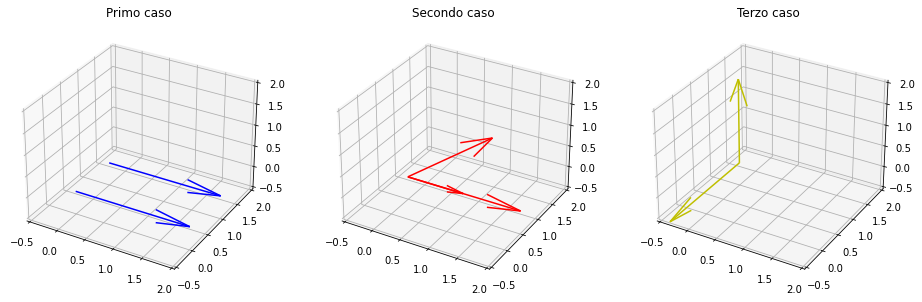

In [118]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16,16))

ax = fig.add_subplot(131, projection='3d')
vec1 = np.array([[0, 0, 0, 2, 0, 0], [0, 1, 0, 2, 0, 0]])
X, Y, Z, U, V, W = zip(*vec1)
ax.quiver(X, Y, Z, U, V, W, color='b')
ax.set_xlim([-0.5, 2])
ax.set_ylim([-0.5, 2])
ax.set_zlim([-0.5, 2])
ax.set_title("Primo caso")

ax = fig.add_subplot(132, projection='3d')
vec2 = np.array([[0, 0.5, 0, 1, 0, 0], [0, 0.5, 0, 2, 0, 0],
                [0, 0.5, 0, 1.5, 0, 1.5]])
X, Y, Z, U, V, W = zip(*vec2)
ax.quiver(X, Y, Z, U, V, W, color='r')
ax.set_xlim([-0.5, 2])
ax.set_ylim([-0.5, 2])
ax.set_zlim([-0.5, 2])
ax.set_title("Secondo caso")


ax = fig.add_subplot(133, projection='3d')
vec3 = np.array([[0, 1, 0, 0, 0, 2], [0, 1, 0, 0, -2, 0]])
X, Y, Z, U, V, W = zip(*vec3)
ax.quiver(X, Y, Z, U, V, W, color='y')
ax.set_xlim([-0.5, 2])
ax.set_ylim([-0.5, 2])
ax.set_zlim([-0.5, 2])
ax.set_title("Terzo caso")

plt.show()

## Primo caso
Nel primo caso la forza magnetica è nulla:  
$F_m = vqBsin(0) = 0$  
La particella è soggetta alla forza di campo elettrico e accelera di conseguenza:  
$a_m = \dfrac{qE}{m}$  
Si tratta di moto uniformemente accelerato, quindi la legge oraria sarà:  
$$x(t) = vt + \dfrac{1}{2}\dfrac{qEt^2}{m}$$

## Secondo caso
La forza di Lorentz agisce deviando in ogni istante la direzione della velocità:  
$F_m = qvB = \dfrac{mv^2}{r}$  
Si tratta di moto circolare uniforme dove la forza magnetica è forza centripeta.
Il campo elettrico imprime una accelerazione costante alla particella nella direzione dell'asse X:  
$a_x = \dfrac{Eq}{m}$    

La traiettoria quindi è:  
$$
\begin{cases}
      y(t) = Rsin(qBt)\\ 
      x(t)= \dfrac{1}{2}at^2+v_{\parallel}t\\
      z(t) = R (1 - cos(qBt))
    \end{cases}
$$


<ipython-input-119-0cf10874b506>:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


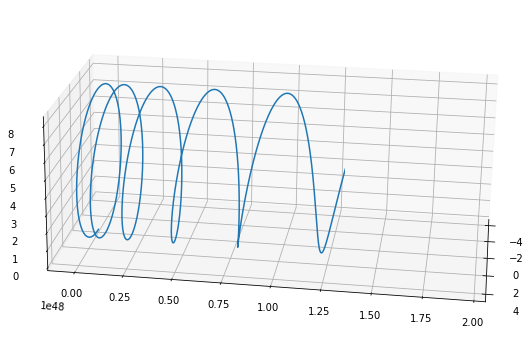

In [119]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11,6))
ax = fig.gca(projection='3d')

q, B, E, m = 1.6e-19, 2.5, 4, 1.67e-27
v = 0.1
R = m*v/(q*B)

a = E*q/m
t = np.linspace(0, 1e20, 50000)

# moto accelerato 
yline = 0.5*a*(t**2)
xline=R*np.sin(q*B*t)
zline=R*(1-np.cos(q*B*t))

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 2, 1, 1]))
ax.view_init(elev=20, azim=10)
ax.plot(xline, yline, zline)

plt.show()

## Terzo caso
La forza risultante è:  
$\vec{F} = q(\vec{E}+\vec{v}\times\vec{B})$  
Non avviene alcun moto verso l'asse Z. Sviluppando si ha:  

$
m\vec{a} = qE\vec{j} + q(\vec{v}\times\vec{B}) = qE\vec{j} + q
\begin{vmatrix}
\vec{i} & \vec{j} & \vec{k}\\
v_x & v_y & 0\\
0 & 0 & B
\end{vmatrix} = qE\vec{j} + qv_yB\vec{i} -qv_xB\vec{j}
$  
L'accelerazione è la derivata della velocità:  
$m\dfrac{dv_x}{dt}\vec{i} = (qv_yB)\vec{i}$  
$m\dfrac{dv_y}{dt}\vec{j} = (qE - qv_xB)\vec{j}$  

Sono equazioni differenziali, si possono risolvere utilizzando un software CAS, per esempio Sympy ottenendo che:  
$v_y = \dfrac{E}{B}sin(\dfrac{qBt}{m})$  
$v_x = \dfrac{E}{B}(1-cos(\dfrac{qBt}{m}))$  

Dalla equazione della velocità si può ricavare la traiettoria attraverso l'integrale:  
$ S = \displaystyle \int_0^t v(t)dt $  

Infine quindi:  
$$
\begin{cases}
      y(t) = \dfrac{E}{B}(1-cos(\dfrac{qBt}{m}))\\
      x(t) = \dfrac{E}{B}(t-\dfrac{msin(\tfrac{qBt}{m})}{qB})\\
      z(t) = 0
    \end{cases}
$$

E' un cicloide.

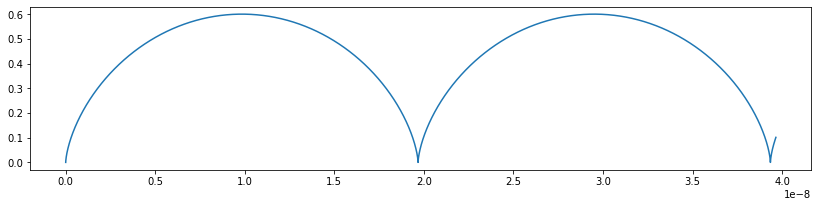

In [120]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,3))

q, B, E, m = 1.6e-19, 1.0, 0.3, 1.67e-27

t = np.linspace(0, 1.4e-7, 100000)
y=(E/B)*(1-np.cos(q*B*t/m))
x=(E/B)*(t-(m*np.sin(q*B*t/m)/(q*B)))

plt.plot(x,y)
plt.show()

## Applicazioni


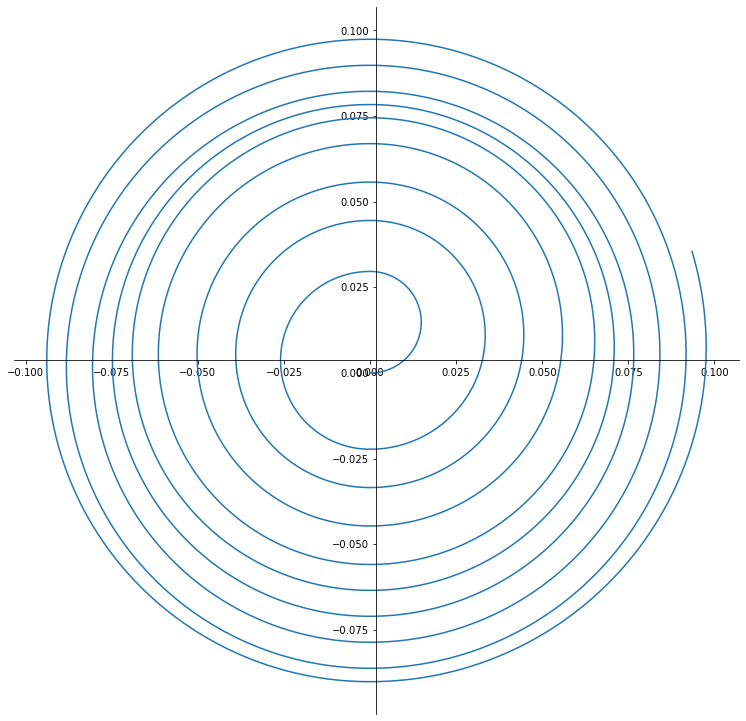

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# calcola la forza risultante
def ftot(p,v,t): 
    f = np.zeros(3)
    """se la particella si trova nel mezzo delle due D
    allora calcola la accelerazione data dal campo elettrico, 
    altrimenti considera la accelerazione centripeta."""
    if np.abs(p[0]) < dist/2:
        f[0] = E*q*np.cos(w*t)
    else:
        f = q*np.cross(v,B)
    return f


def trajectory(dt):
    p = np.array([[0,0,0]])
    v = np.array([[0,0,0]])
    t = np.array([0])
    i = 0
    """finché la particella è dentro il raggio del ciclotrone calcola
    istante per istante (dt) la forza risultante, la velocità istanea
    (che incrementa ad ogni passaggio attraverso la intercapedine) e la 
    posizione della particella (che varia in base alla velocità). Tutti 
    questi dati sono salvati negli array così posso conoscere la velocità 
    finale, il tempo totale impiegato e la posizione di uscita"""
    while np.linalg.norm(p[i]) < radius:
        t = np.append(t, t[i]+dt)
        f = ftot(p[i], v[i], t[i])
        v = np.vstack((v, (v[i] + f / m * dt)))
        p = np.vstack((p, (p[i] + v[i+1] * dt))) 
        i+=1
    return p[:i], v[:i], t[:i]


q, m, dist, radius = 1.6e-19, 1.67e-27, 90e-6, 0.1
V=50000
B = np.array([0.0,1.5,0.0])

# poiché le D sono un un condensatore piano il campo elettrico è questo
E = V/dist
w = q*np.linalg.norm(B)/m
p,v,t = trajectory(5e-12)

fig, ax = plt.subplots(figsize=(13,13))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# il moto avviene sul piano X-Z quindi seleziono tutti gli elementi di p[0] e p[2]
plt.plot(p[:,0], p[:,2])